In [1]:
import pandas as pd
df = pd.read_csv('../livecoding-data/Student_Performance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [12]:
X = df.drop(columns='Performance Index')
y = df['Performance Index']

---
## Checking feature distributions


In [15]:
X['Hours Studied'].value_counts()

1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: Hours Studied, dtype: int64

<Axes: ylabel='Frequency'>

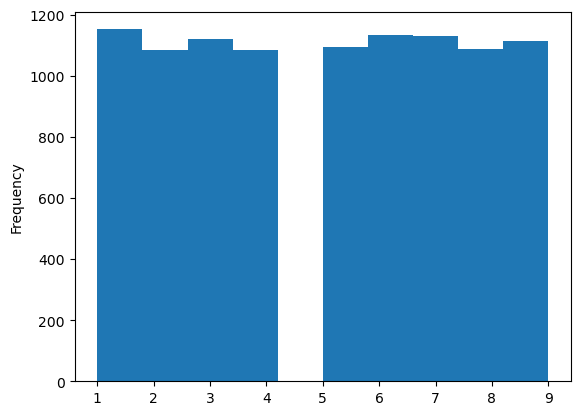

In [16]:
X['Hours Studied'].plot(kind='hist')

<Axes: >

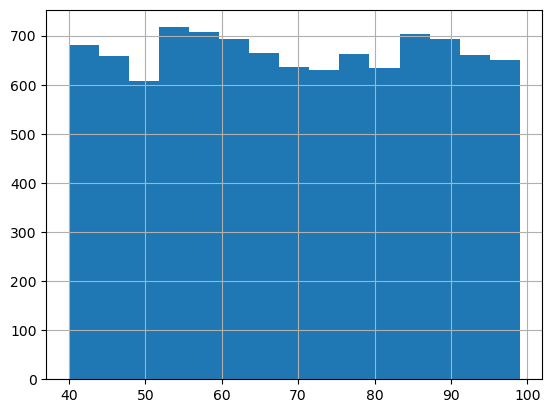

In [20]:
X['Previous Scores'].hist(bins=15)

<Axes: >

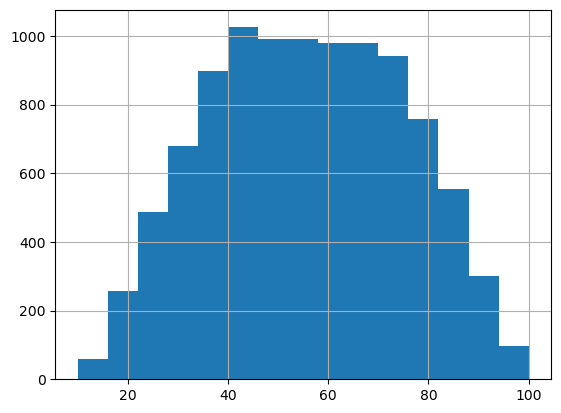

In [22]:
y.hist(bins=15)

<Axes: >

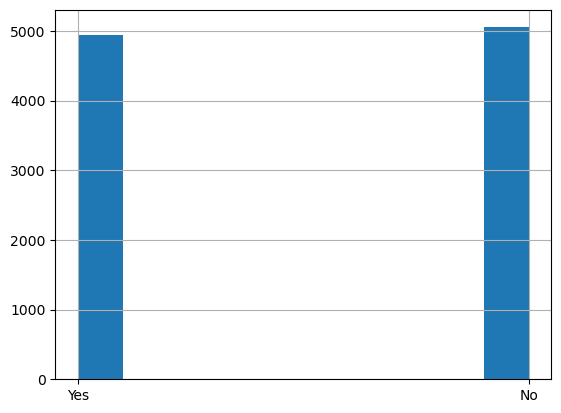

In [23]:
X['Extracurricular Activities'].hist()

<Axes: >

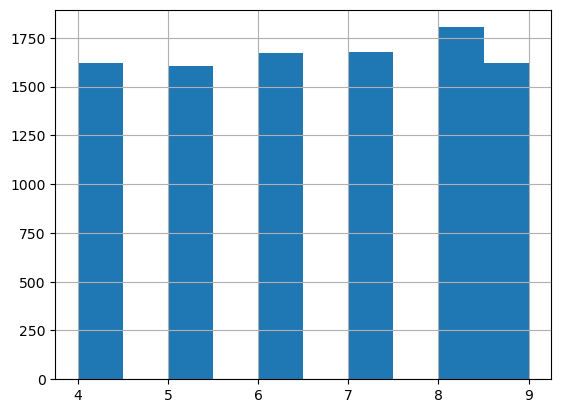

In [24]:
X['Sleep Hours'].hist()

<Axes: >

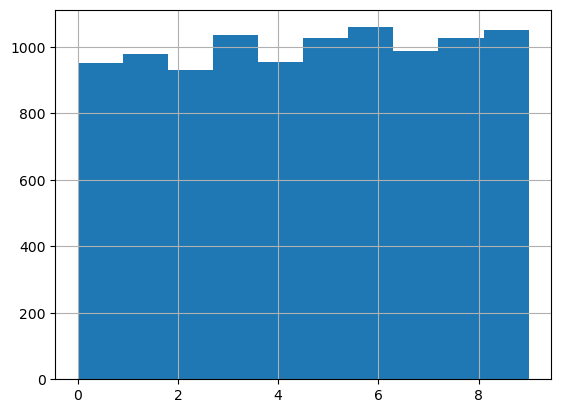

In [25]:
X['Sample Question Papers Practiced'].hist()

In [28]:
# Alternative method of quickly checking correlations and distributions

# import seaborn as sns

# sns.pairplot(df)

---
## Modelling in 3 ways 

AKA all roads lead to the same destination 

In [30]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
# Quickly removing spaces from column names
new_cols = []

for col in df.columns.values:
    new_cols.append(col.replace(' ', '_'))

In [41]:
df.columns = new_cols

In [42]:
df

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [46]:
# Statsmodels formulas API. Documentation:
# https://www.statsmodels.org/stable/example_formulas.html

model = smf.ols(formula='Performance_Index ~ Hours_Studied', data=df).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance_Index   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:20:08   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        41.3792      0.387    106.890      0.000      40.620      42.138
Hours_Studied     2.7731      0.069     40.289      0.000       2.638       2.908
==============================================================================
Omnibus:                     6751.810   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.766
Skew:                           0.002   Prob(JB):                    1.15e-124
Kurtosis:                       1.830   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Example of a more complex formula
model = smf.ols(formula='''
                Performance_Index ~ Hours_Studied*Previous_Scores + 
                Extracurricular_Activities + C(Sleep_Hours) + 
                Sample_Question_Papers_Practiced''', data=df).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance_Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 8.784e+04
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:23:19   Log-Likelihood:                -21305.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9989   BIC:                         4.271e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -32.2030      0.192   -167.902      0.000     -32.579     -31.827
Extracurricular_Activities[T.Yes]     0.6134      0.041     15.039      0.000       0.533       0.693
C(Sleep_Hours)[T.5]                   0.5326      0.072      7.418      0.000       0.392       0.673
C(Sleep_Hours)[T.6]                   0.9571      0.071     13.468      0.000       0.818       1.096
C(Sleep_Hours)[T.7]                   1.3766      0.071     19.379      0.000       1.237       1.516
C(Sleep_Hours)[T.8]                   1.9149      0.070     27.440      0.000       1.778       2.052
C(Sleep_Hours)[T.9]                   2.4511      0.072     34.218      0.000       2.311       2.592
Hours_Studied                         2.8625      0.032     88.526      0.000       2.799       2.926
Previous_Scores                       1.0191      0.003    399.626      0.000       1.014       1.024
Hours_Studied:Previous_Scores        -0.0001      0.000     -0.306      0.760      -0.001       0.001
Sample_Question_Papers_Practiced      0.1937      0.007     27.240      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.935   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                4.123
Skew:                           0.014   Prob(JB):                        0.127
Kurtosis:                       3.095   Cond. No.                     3.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
X.shape, y.shape

((10000, 4), (10000,))

In [59]:
# Quick fix - converting categorical into numeric

df.Extracurricular_Activities = df.Extracurricular_Activities.apply(
                                lambda x: 1 if x == 'Yes' else 0)

In [123]:
# Redefine X
X = df.drop(columns='Performance_Index')

In [76]:
# Running smf again with a new name
modelSMF = smf.ols(formula='''
                Performance_Index ~ Hours_Studied + Previous_Scores + 
                Extracurricular_Activities + Sleep_Hours + 
                Sample_Question_Papers_Practiced''', data=df).fit()

modelSMF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance_Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:34:03   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours_Studied                        2.8530      0.008    362.353      0.000       2.838       2.868
Previous_Scores                      1.0184      0.001    866.450      0.000       1.016       1.021
Extracurricular_Activities           0.6129      0.041     15.029      0.000       0.533       0.693
Sleep_Hours                          0.4806      0.012     39.972      0.000       0.457       0.504
Sample_Question_Papers_Practiced     0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Statsmodels python API

modelSM = sm.OLS(y, sm.add_constant(X)).fit()
modelSM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:33:36   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours_Studied                        2.8530      0.008    362.353      0.000       2.838       2.868
Previous_Scores                      1.0184      0.001    866.450      0.000       1.016       1.021
Extracurricular_Activities           0.6129      0.041     15.029      0.000       0.533       0.693
Sleep_Hours                          0.4806      0.012     39.972      0.000       0.457       0.504
Sample_Question_Papers_Practiced     0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Scikit-learn 
# Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

modelLR = LinearRegression()
modelLR.fit(X, y)

LinearRegression()

In [72]:
# Attributes starting with _ indicate 'private' attributes, i.e.
# methods that should not be accessed or called from outside the class

# Attributes ending in _ are estimates, e.g. regression coefficients

for attr in dir(modelLR):
    if not attr.startswith('_'):
        print(attr)

coef_
copy_X
feature_names_in_
fit
fit_intercept
get_metadata_routing
get_params
intercept_
n_features_in_
n_jobs
positive
predict
rank_
score
set_fit_request
set_params
set_score_request
singular_


In [73]:
modelLR.coef_

array([2.85298205, 1.01843419, 0.61289758, 0.48055975, 0.19380214])

In [74]:
modelLR.intercept_

-34.07558809191325

In [77]:
# Let's compare our 3 models' parameters

coef_LR = modelLR.coef_
coef_SM = modelSM.params
coef_SMF = modelSMF.params

In [81]:
import numpy as np

In [82]:
coef_LR = np.array([modelLR.intercept_] + list(coef_LR))

In [83]:
coef_LR

array([-34.07558809,   2.85298205,   1.01843419,   0.61289758,
         0.48055975,   0.19380214])

In [79]:
coef_SM

const                              -34.075588
Hours_Studied                        2.852982
Previous_Scores                      1.018434
Extracurricular_Activities           0.612898
Sleep_Hours                          0.480560
Sample_Question_Papers_Practiced     0.193802
dtype: float64

In [85]:
coef_SMF

Intercept                          -34.075588
Hours_Studied                        2.852982
Previous_Scores                      1.018434
Extracurricular_Activities           0.612898
Sleep_Hours                          0.480560
Sample_Question_Papers_Practiced     0.193802
dtype: float64

In [87]:
# We can also compare prediction methods
modelSMF.predict(X)

0       91.852009
1       63.157787
2       45.052832
3       36.551201
4       67.091339
          ...    
9995    21.603410
9996    56.501461
9997    72.998729
9998    94.366183
9999    65.297697
Length: 10000, dtype: float64

In [90]:
modelSM.predict(sm.add_constant(X))

0       91.852009
1       63.157787
2       45.052832
3       36.551201
4       67.091339
          ...    
9995    21.603410
9996    56.501461
9997    72.998729
9998    94.366183
9999    65.297697
Length: 10000, dtype: float64

In [91]:
modelLR.predict(X)

array([91.85200884, 63.15778719, 45.05283229, ..., 72.99872851,
       94.36618291, 65.29769669])

---
## Plotting the effect of a single feature

In [92]:
modelSM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:40:00   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours_Studied                        2.8530      0.008    362.353      0.000       2.838       2.868
Previous_Scores                      1.0184      0.001    866.450      0.000       1.016       1.021
Extracurricular_Activities           0.6129      0.041     15.029      0.000       0.533       0.693
Sleep_Hours                          0.4806      0.012     39.972      0.000       0.457       0.504
Sample_Question_Papers_Practiced     0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# A linear regression model holds a collection of betas - that's it

# Predictions are produced via the following formula:
# y_hat = b0 + b1x1 + b2x2 + b3x3 ... bnxn

X.values[0]

array([ 7, 99,  1,  9,  1])

In [98]:
modelLR.coef_

array([2.85298205, 1.01843419, 0.61289758, 0.48055975, 0.19380214])

In [102]:
# It's simple dot products

# 1*modelLR.intercept_ + X.values[0]@modelLR.coef_
1*modelLR.intercept_ + np.dot(X.values[0], modelLR.coef_)

91.85200883832276

In [124]:
# What if we rearrange the matrix?

hours = X.Hours_Studied
X = X.drop(columns='Hours_Studied')
X = pd.concat([X, hours], axis=1)

In [112]:
modelSMF.predict(X)

0       91.852009
1       63.157787
2       45.052832
3       36.551201
4       67.091339
          ...    
9995    21.603410
9996    56.501461
9997    72.998729
9998    94.366183
9999    65.297697
Length: 10000, dtype: float64

In [113]:
modelSM.predict(sm.add_constant(X))

0       256.741322
1       204.056859
2       119.246751
3       120.292531
4       188.560660
           ...    
9995    110.345479
9996    158.196292
9997    212.209149
9998    249.716608
9999    183.785439
Length: 10000, dtype: float64

In [117]:
modelLR.predict(X.values)

/Users/josephpeart/opt/anaconda3/envs/bcenv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([256.74132237, 204.0568587 , 119.24675053, ..., 212.20914881,
       249.71660763, 183.78543926])

In [118]:
modelSM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:50:25   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0756      0.127   -268.010      0.000     -34.325     -33.826
Hours_Studied                        2.8530      0.008    362.353      0.000       2.838       2.868
Previous_Scores                      1.0184      0.001    866.450      0.000       1.016       1.021
Extracurricular_Activities           0.6129      0.041     15.029      0.000       0.533       0.693
Sleep_Hours                          0.4806      0.012     39.972      0.000       0.457       0.504
Sample_Question_Papers_Practiced     0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
hours = X.Hours_Studied
X = X.drop(columns='Hours_Studied')
X.insert(0, 'Hours_Studied', hours)

In [131]:
X.Sleep_Hours.min(), X.Sleep_Hours.max()

(4, 9)

In [159]:
Xfit = X.copy()
Xfit.Sleep_Hours = np.linspace(X.Sleep_Hours.min(), X.Sleep_Hours.max(), X.shape[0])

In [136]:
Xfit

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,7,99,1,4.0000,1
1,4,82,0,4.0005,2
2,8,51,1,4.0010,2
3,5,52,1,4.0015,2
4,7,75,0,4.0020,5
...,...,...,...,...,...
9995,1,49,1,8.9980,2
9996,7,64,1,8.9985,5
9997,6,83,1,8.9990,5
9998,9,97,1,8.9995,0


In [137]:
import matplotlib.pyplot as plt

In [139]:
yfit = modelSM.predict(sm.add_constant(Xfit))

In [147]:
Xfit.Sleep_Hours

0       4.0000
1       4.0005
2       4.0010
3       4.0015
4       4.0020
         ...  
9995    8.9980
9996    8.9985
9997    8.9990
9998    8.9995
9999    9.0000
Name: Sleep_Hours, Length: 10000, dtype: float64

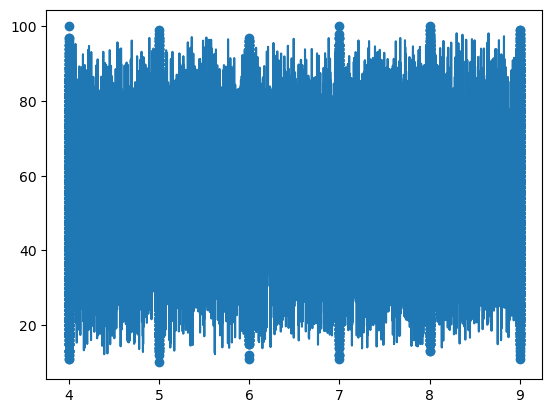

In [146]:
# The wrong way - we didn't hold anything constant! 

plt.scatter(X.Sleep_Hours, y)
plt.plot(Xfit.Sleep_Hours, yfit)

In [150]:
model_simple = sm.OLS(y, sm.add_constant(X.Sleep_Hours)).fit()

In [152]:
yfit_simple = model_simple.predict(sm.add_constant(Xfit.Sleep_Hours))

In [154]:
model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.19
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.49e-06
Time:                        13:02:44   Log-Likelihood:                -43733.
No. Observations:               10000   AIC:                         8.747e+04
Df Residuals:                    9998   BIC:                         8.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          51.6657      0.764     67.662      0.000      50.169      53.162
Sleep_Hours     0.5450      0.113      4.816      0.000       0.323       0.767
==============================================================================
Omnibus:                     1152.429   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.489
Skew:                          -0.002   Prob(JB):                     2.30e-68
Kurtosis:                       2.135   Cond. No.                         27.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

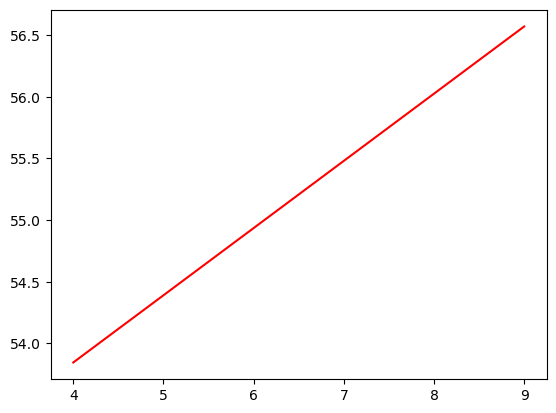

In [177]:
# The wrong way - this model is terrible! 

plt.plot(Xfit.Sleep_Hours, yfit_simple, 'r')

In [160]:
# To graph the impact of a single variable, we must hold all others constant

for col in Xfit.columns.values:
    if col == 'Sleep_Hours':
        continue
    Xfit[col] = Xfit[col].mean()

In [161]:
Xfit

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced
0,4.9929,69.4457,0.4948,4.0000,4.5833
1,4.9929,69.4457,0.4948,4.0005,4.5833
2,4.9929,69.4457,0.4948,4.0010,4.5833
3,4.9929,69.4457,0.4948,4.0015,4.5833
4,4.9929,69.4457,0.4948,4.0020,4.5833
...,...,...,...,...,...
9995,4.9929,69.4457,0.4948,8.9980,4.5833
9996,4.9929,69.4457,0.4948,8.9985,4.5833
9997,4.9929,69.4457,0.4948,8.9990,4.5833
9998,4.9929,69.4457,0.4948,8.9995,4.5833


In [166]:
Xfit.insert(0, 'const', np.ones(10000))

In [170]:
yfit = modelSM.predict(Xfit)

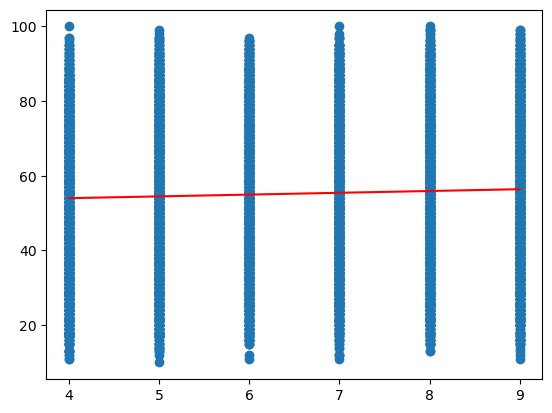

In [176]:
# The right way

plt.scatter(X.Sleep_Hours, y)
plt.plot(Xfit.Sleep_Hours, yfit, 'r')

---
## A bit on prediction / confidence intervals

In [181]:
Xfit.values[0][-2] = 6

In [184]:
modelSM.predict(Xfit.values[0])

array([54.96981499])

In [185]:
modelSM.params @ Xfit.values[0]

54.96981499415

In [188]:
modelSM.conf_int() # 95% confidence intervals of the coefficients

,0,1
const,-34.324814,-33.826363
Hours_Studied,2.837548,2.868416
Previous_Scores,1.016130,1.020738
Extracurricular_Activities,0.532960,0.692836
Sleep_Hours,0.456994,0.504126
Sample_Question_Papers_Practiced,0.179865,0.207740


In [207]:
modelSM.get_prediction(Xfit.values[0]).conf_int()

array([[54.92795305, 55.01167693]])

In [203]:
modelSM.get_prediction(Xfit.values[0]).summary_frame()

# .summary_frame() provides confidence intervals for a prediction in table form

# mean -- actual predicted value, matches the result of model.predict()

# mean_se -- standard error of the mean

# mean_ci_lower/upper -- 95% CI of the mean prediction, e.g. 
# if you made N predictions, we are 95% sure that the mean of those 
# predictions falls within these bounds 

# obs_ci_lower/upper -- the range we expect a given observation to fall between
# (not the mean of the predictions, which is the previous CI)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,54.969815,0.021356,54.927953,55.011677,50.974513,58.965117
